<a href="https://colab.research.google.com/github/cyyeh/ds-portfolios/blob/master/projects/youbike/notebooks/1.0-youbike-integration-data-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Youbike Integration Data EDA

In [1]:
!git clone https://github.com/cyyeh/ds-portfolios.git
!mv ds-portfolios dsportfolios

Cloning into 'ds-portfolios'...
remote: Enumerating objects: 237, done.
remote: Counting objects: 100% (237/237), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 237 (delta 122), reused 151 (delta 54), pack-reused 0
Receiving objects: 100% (237/237), 11.31 MiB | 19.37 MiB/s, done.
Resolving deltas: 100% (122/122), done.


In [2]:
# install chinese font
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifCJKtc-hinted.zip
!unzip NotoSerifCJKtc-hinted.zip
!mv NotoSerifCJKtc-Medium.otf /usr/share/fonts/truetype/

--2020-03-11 05:46:06--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 172.217.203.128, 2607:f8b0:400c:c07::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130464138 (124M) [application/zip]
Saving to: ‘NotoSerifCJKtc-hinted.zip’

NotoSerifCJKtc-hint 100%[===================>] 124.42M   124MB/s    in 1.0s    

2020-03-11 05:46:07 (124 MB/s) - ‘NotoSerifCJKtc-hinted.zip’ saved [130464138/130464138]

Archive:  NotoSerifCJKtc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSerifCJKtc-Black.otf  
  inflating: NotoSerifCJKtc-Bold.otf  
  inflating: NotoSerifCJKtc-ExtraLight.otf  
  inflating: NotoSerifCJKtc-Light.otf  
  inflating: NotoSerifCJKtc-Medium.otf  
  inflating: NotoSerifCJKtc-Regular.otf  
  inflating: NotoS

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from dsportfolios.projects.youbike.src.data import make_dataset
from dsportfolios.projects.youbike.src.visualization import visualize

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/NotoSerifCJKtc-Medium.otf'
font_prop = fm.FontProperties(fname=font_path, size=15)

import warnings
warnings.filterwarnings('ignore')

## Get Data

In [0]:
df = make_dataset.get_youbike_integration_df()

In [6]:
df

,可借車數,細懸浮微粒(μg/m^3),總碳氫化合物(ppm),懸浮微粒(μg/m^3),甲烷(ppm),一氧化碳(ppm),二氧化氮(ppb),氮氧化物(ppb),二氧化硫(ppb),臭氧(ppb),氣溫(℃),相對溼度(%),風速(m/s),風向(360degree),降水量(mm)
2018-01-01 00:00:00,29.0,12.0,2.0,80.0,1.9,0.48,16.0,17.0,1.7,32.0,15.9,71.0,3.3,50.0,0.0
2018-01-01 00:10:00,29.0,12.0,2.0,80.0,1.9,0.48,16.0,17.0,1.7,32.0,15.9,71.0,3.3,50.0,0.0
2018-01-01 00:15:00,29.0,12.0,2.0,80.0,1.9,0.48,16.0,17.0,1.7,32.0,15.9,71.0,3.3,50.0,0.0
2018-01-01 00:20:00,30.0,12.0,2.0,80.0,1.9,0.48,16.0,17.0,1.7,32.0,15.9,71.0,3.3,50.0,0.0
2018-01-01 00:25:00,24.0,12.0,2.0,80.0,1.9,0.48,16.0,17.0,1.7,32.0,15.9,71.0,3.3,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-15 23:40:00,3.0,3.0,2.5,22.0,2.0,0.91,39.0,50.0,4.1,2.9,24.6,81.0,1.2,170.0,0.1
2018-06-15 23:45:00,4.0,3.0,2.5,22.0,2.0,0.91,39.0,50.0,4.1,2.9,24.6,81.0,1.2,170.0,0.1
2018-06-15 23:50:00,3.0,3.0,2.5,22.0,2.0,0.91,39.0,50.0,4.1,2.9,24.6,81.0,1.2,170.0,0.1
2018-06-15 23:55:00,0.0,3.0,2.5,22.0,2.0,0.91,39.0,50.0,4.1,2.9,24.6,81.0,1.2,170.0,0.1


## EDA

### Data Types and No NaN Check

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44323 entries, 2018-01-01 00:00:00 to 2018-06-16 00:00:00
Data columns (total 15 columns):
可借車數             44323 non-null float64
細懸浮微粒(μg/m^3)    44323 non-null float64
總碳氫化合物(ppm)      44323 non-null float64
懸浮微粒(μg/m^3)     44323 non-null float64
甲烷(ppm)          44323 non-null float64
一氧化碳(ppm)        44323 non-null float64
二氧化氮(ppb)        44323 non-null float64
氮氧化物(ppb)        44323 non-null float64
二氧化硫(ppb)        44323 non-null float64
臭氧(ppb)          44323 non-null float64
氣溫(℃)            44323 non-null float64
相對溼度(%)          44323 non-null float64
風速(m/s)          44323 non-null float64
風向(360degree)    44323 non-null float64
降水量(mm)          44323 non-null float64
dtypes: float64(15)
memory usage: 5.4 MB


### Correlation Analysis Using Heatmap

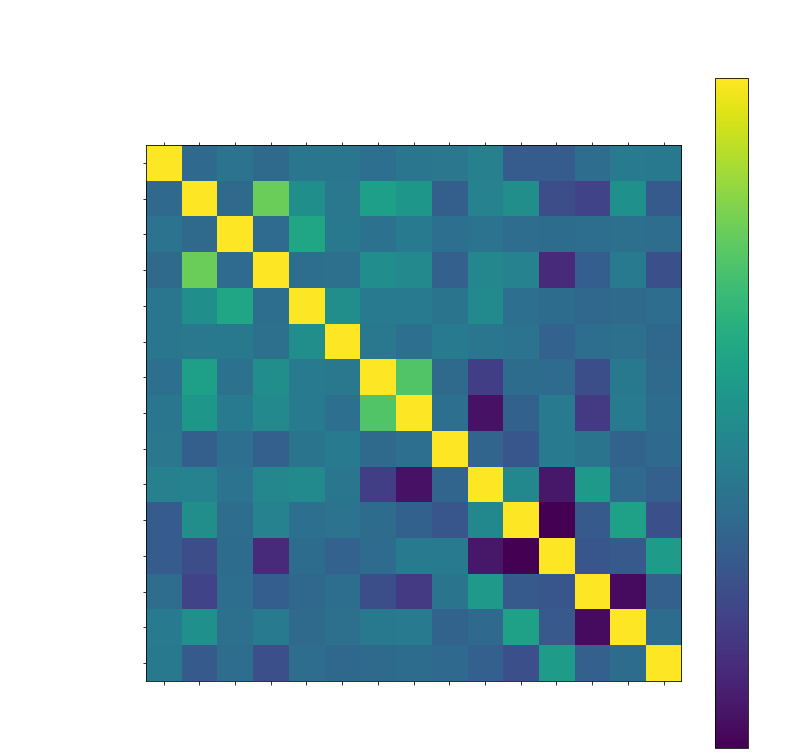

In [8]:
visualize.draw_heatmap_by_column(df, font_prop=font_prop)

### Line Plot

#### per 5 Minutes(realtime)

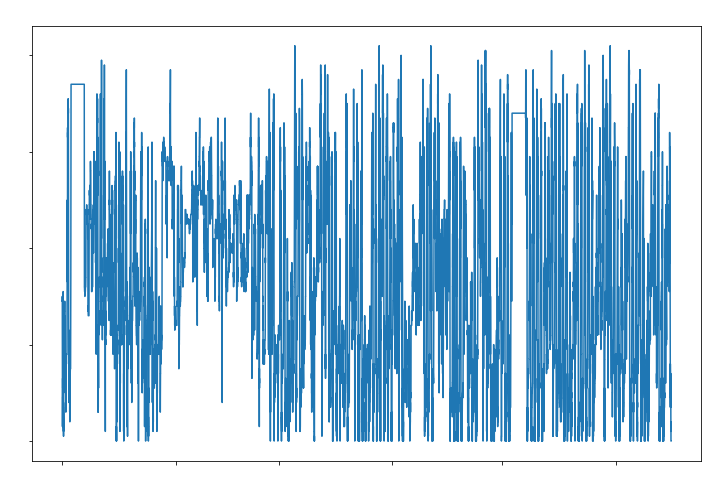

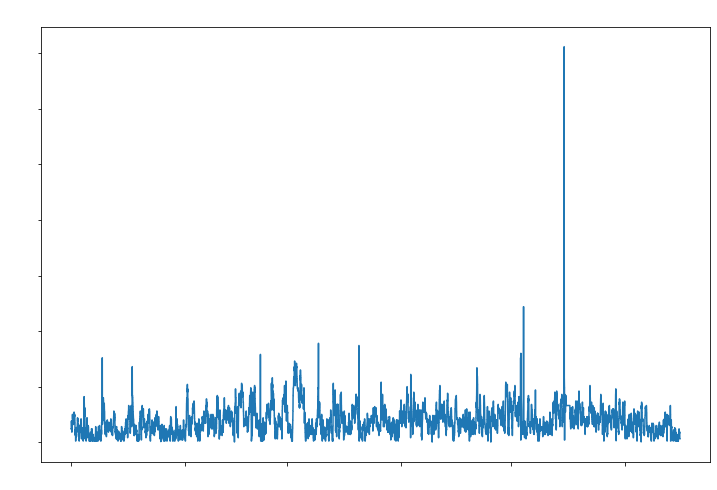

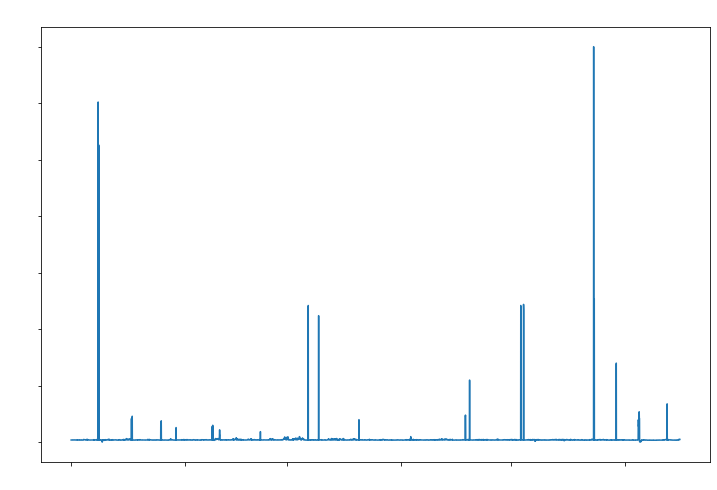

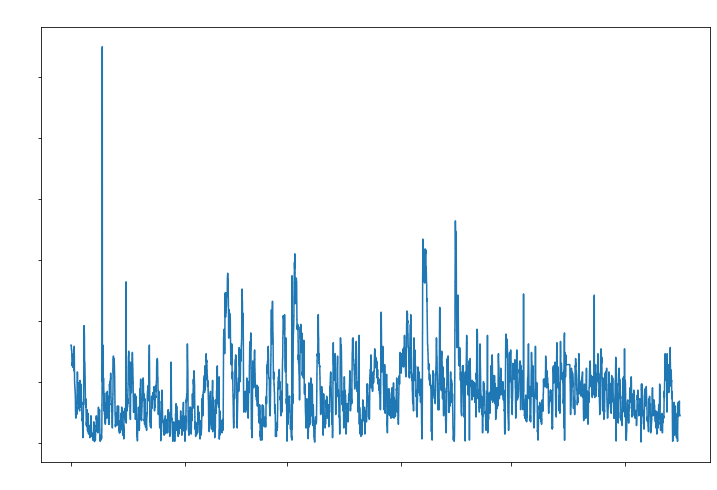

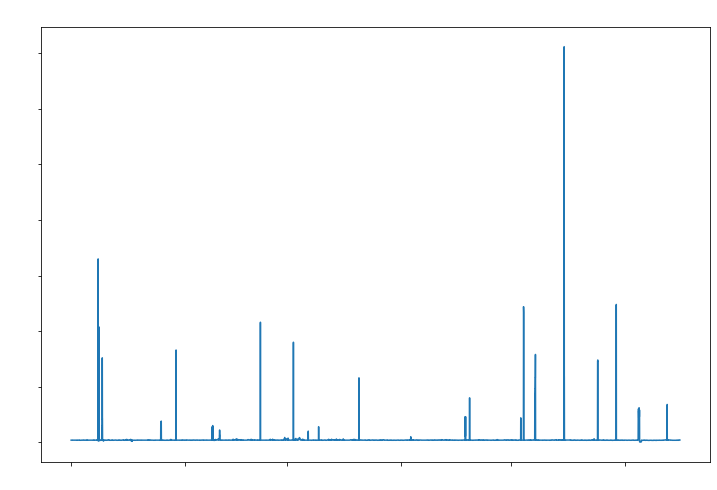

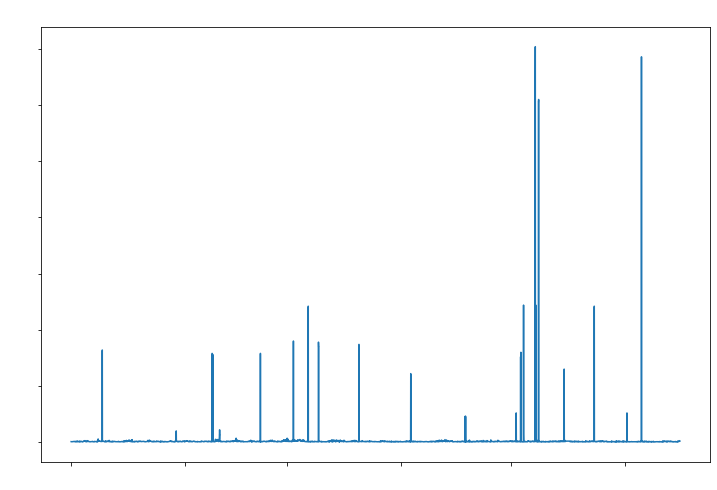

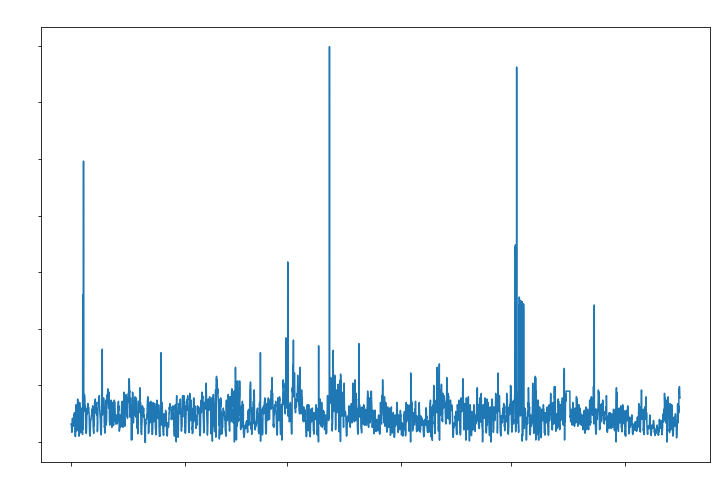

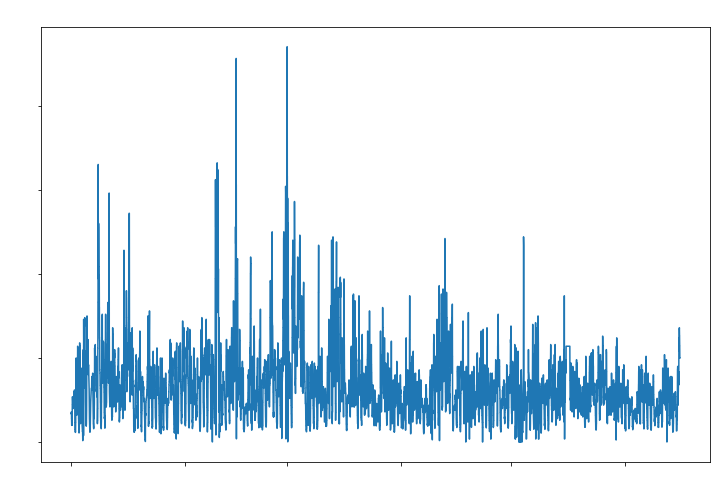

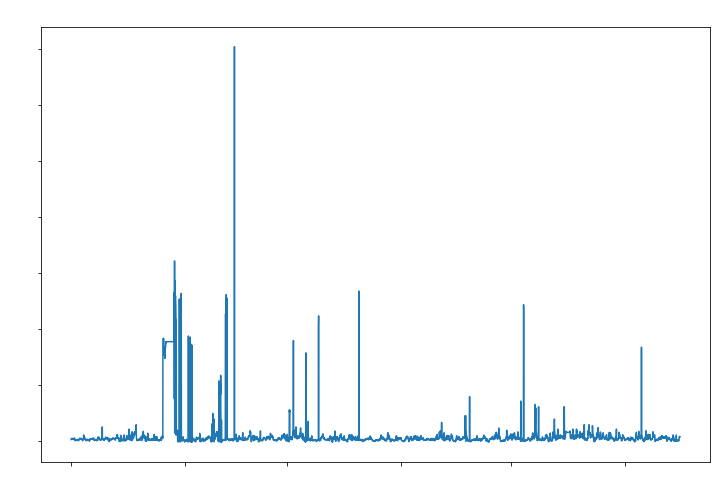

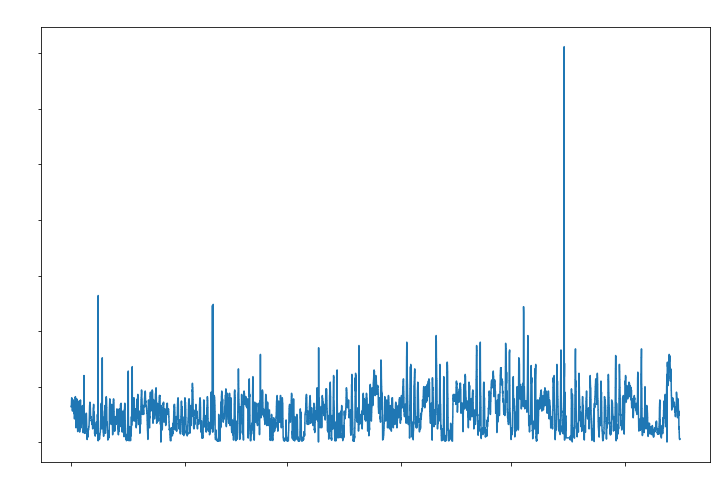

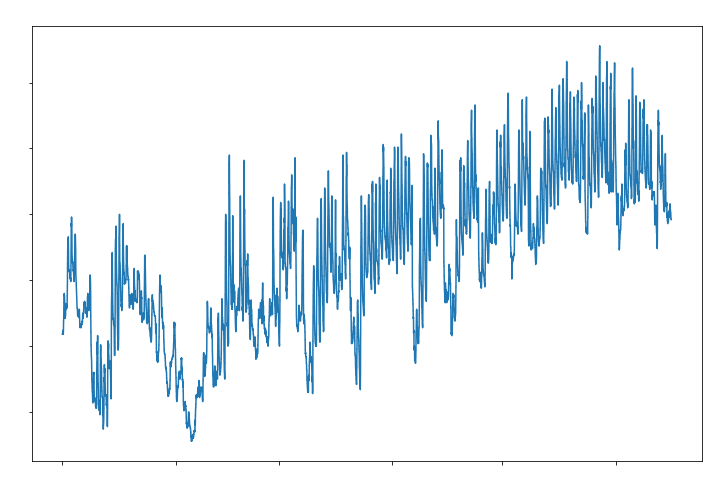

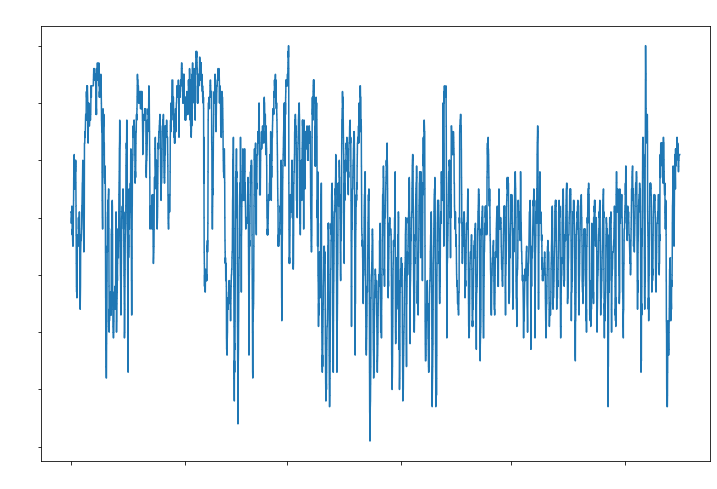

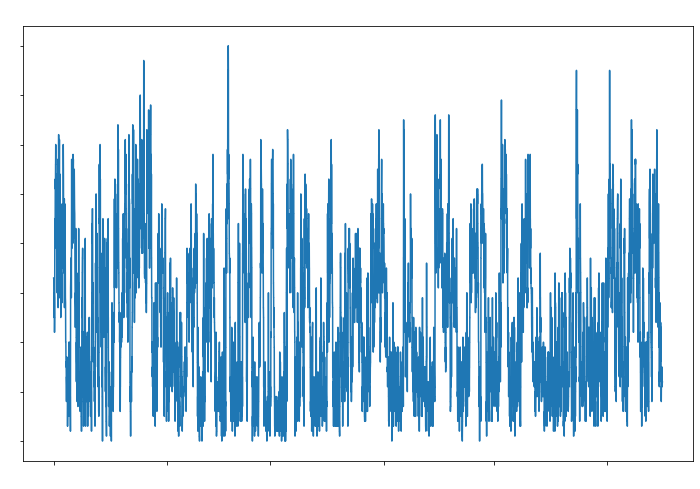

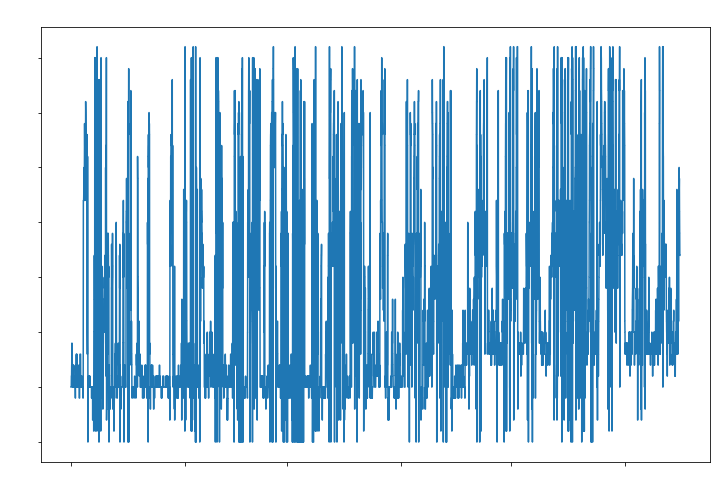

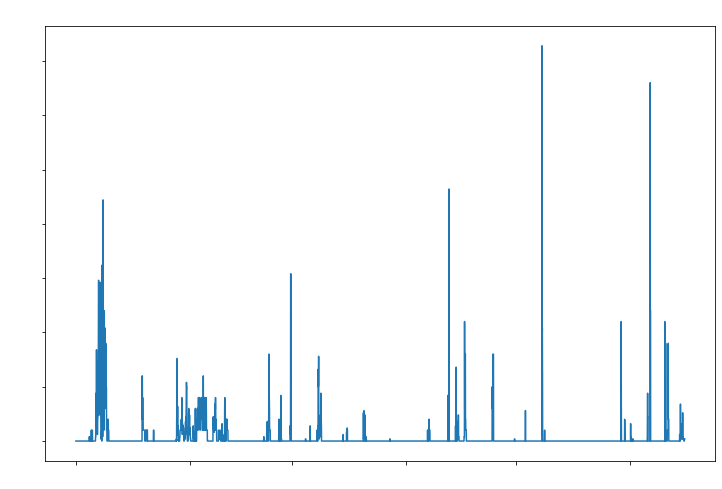

In [9]:
visualize.draw_line_plot_by_column(df, font_prop=font_prop)

#### per Hour

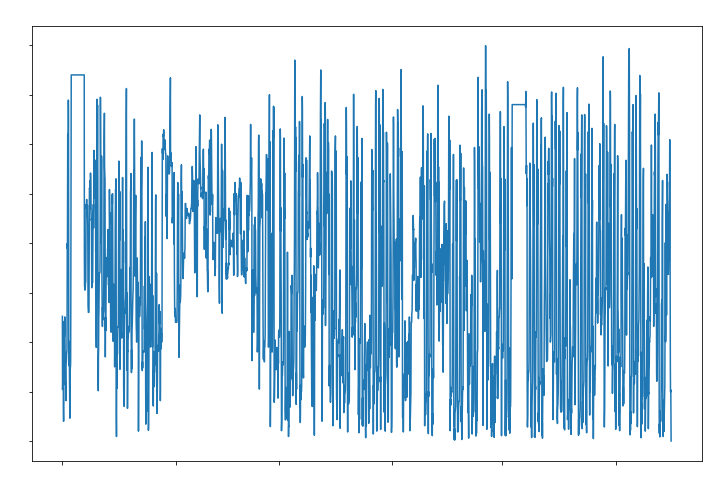

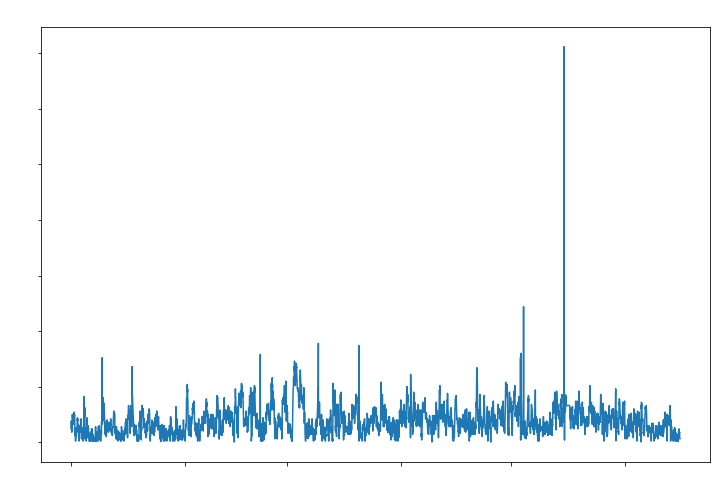

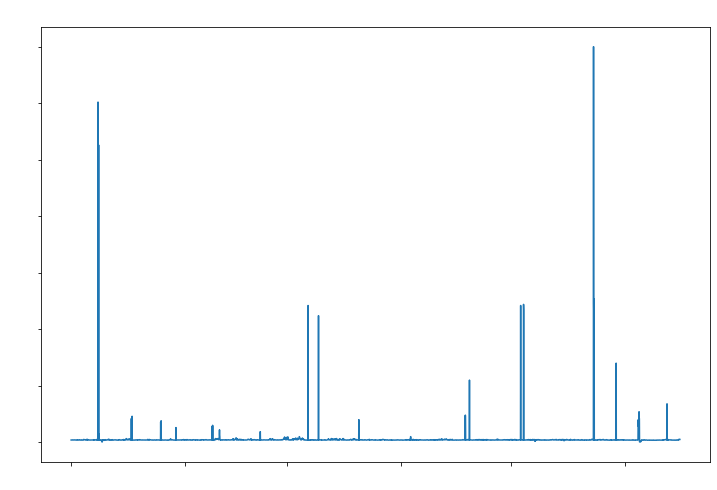

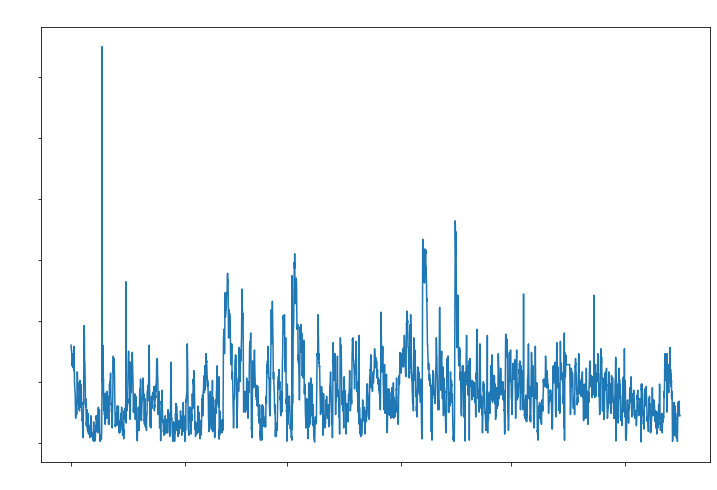

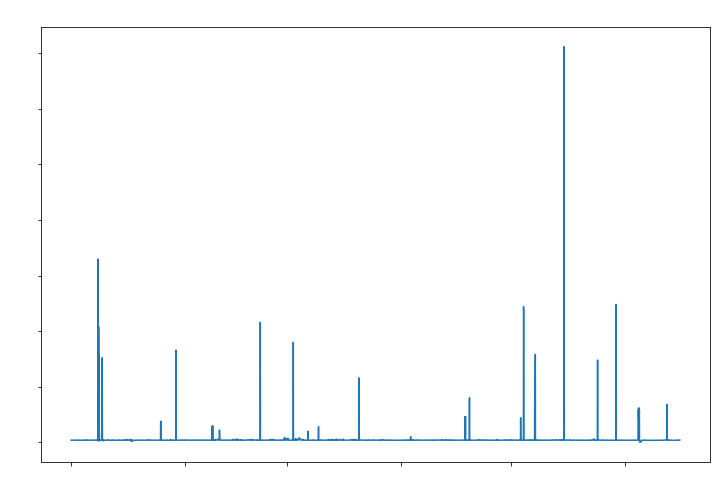

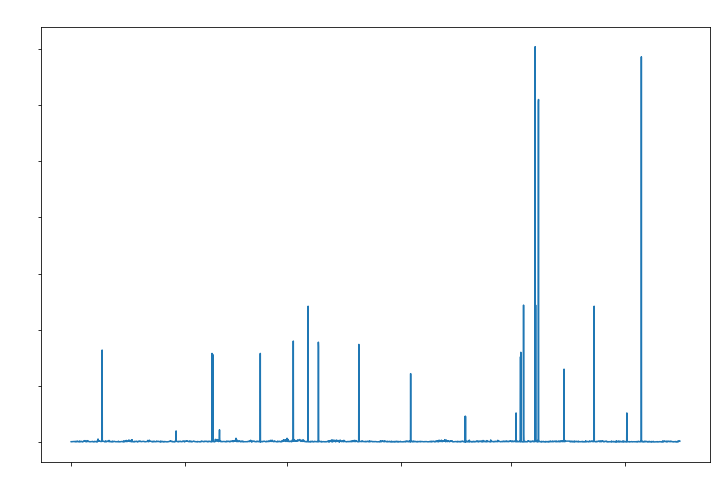

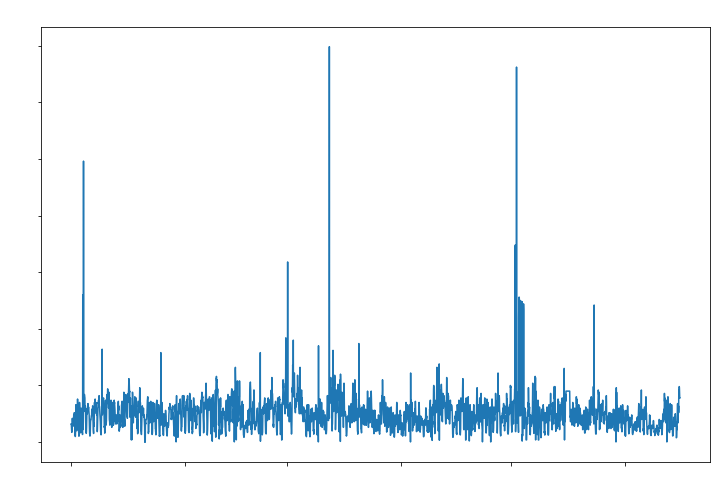

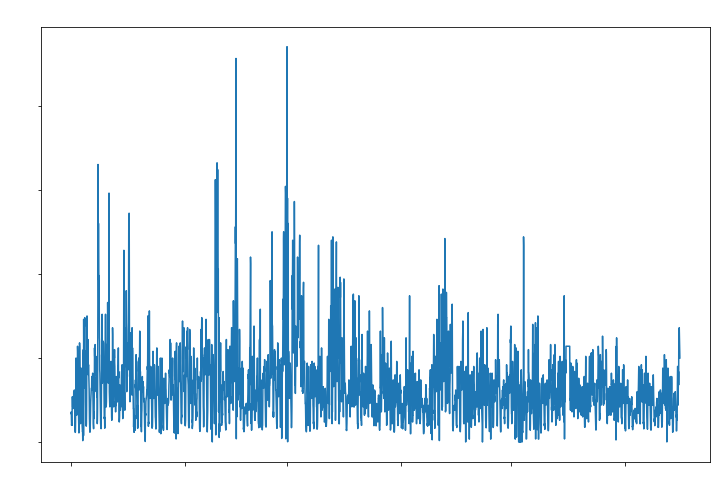

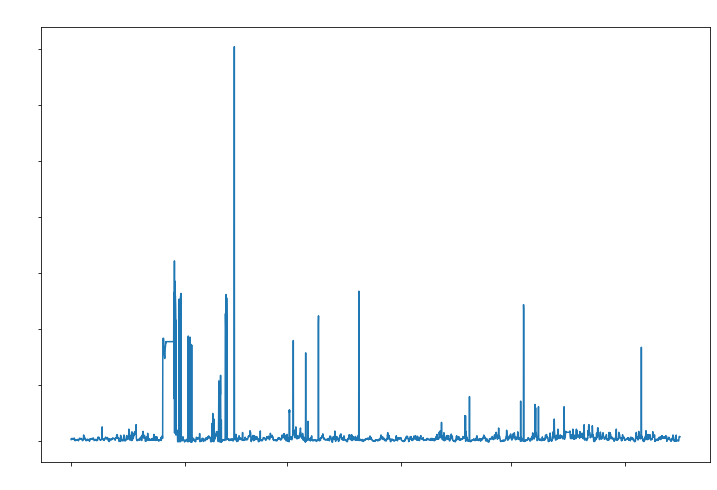

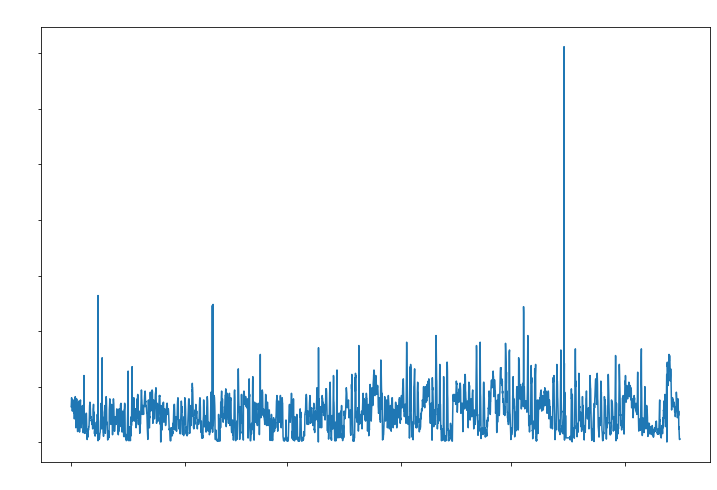

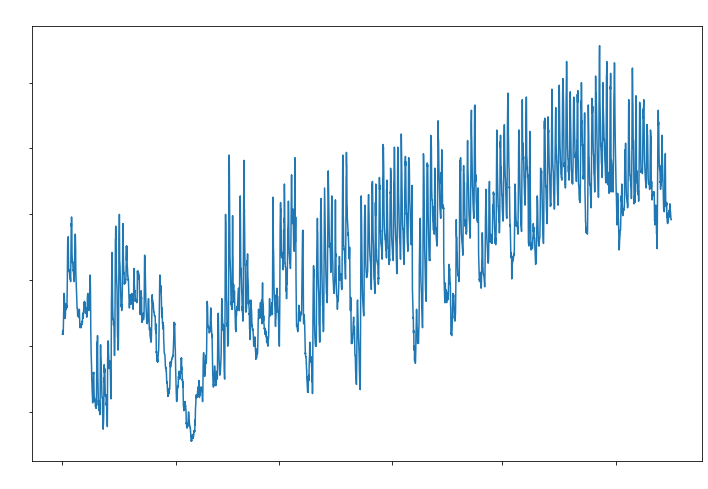

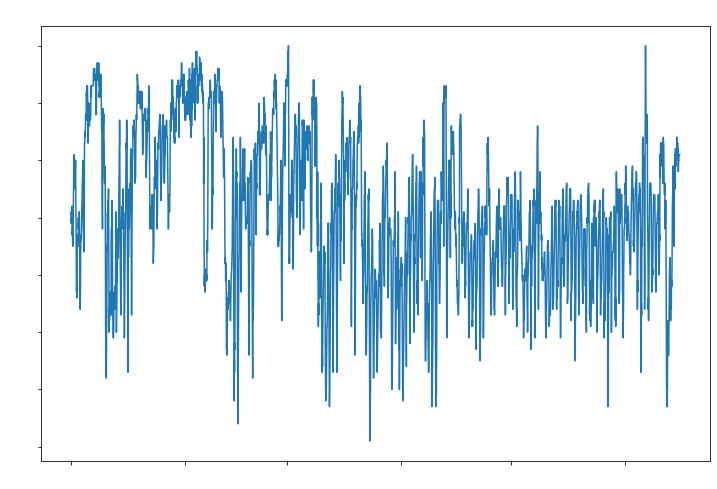

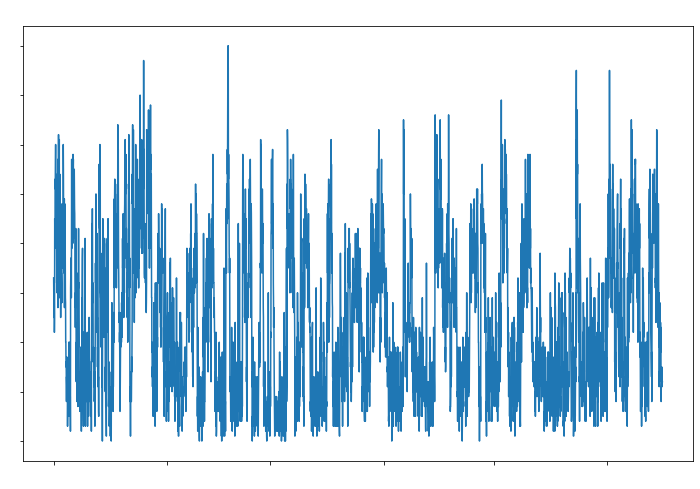

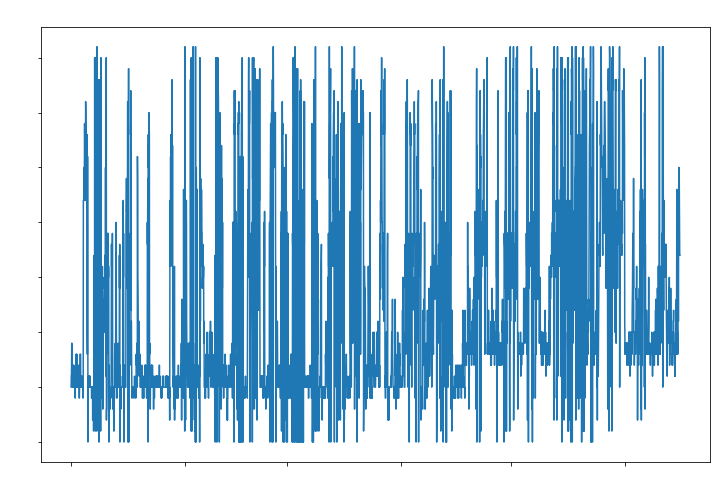

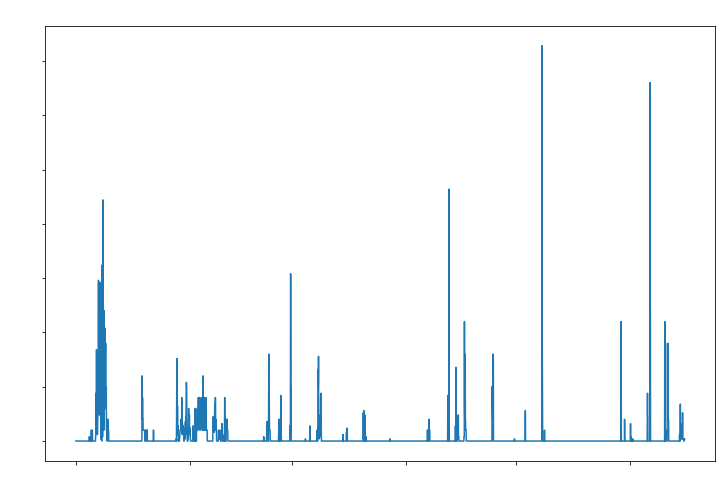

In [11]:
df_H = make_dataset.resample_df(df, freq='H')
visualize.draw_line_plot_by_column(df_H, font_prop=font_prop)

#### per Day

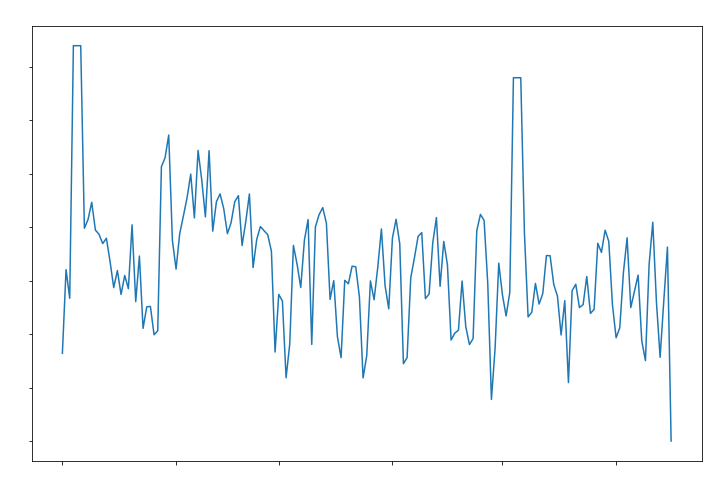

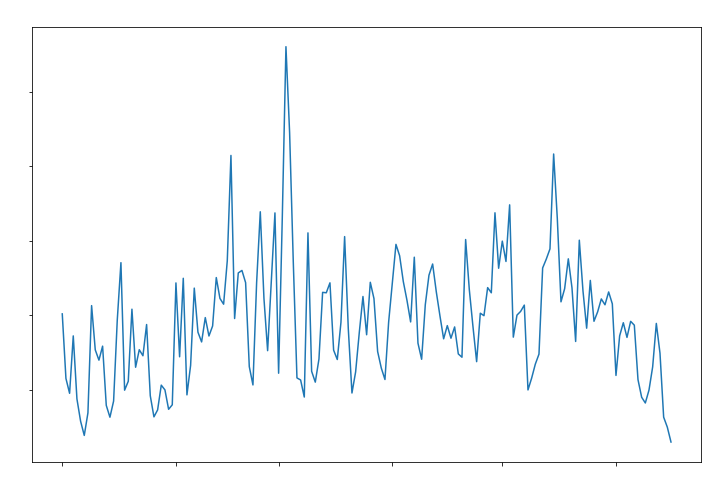

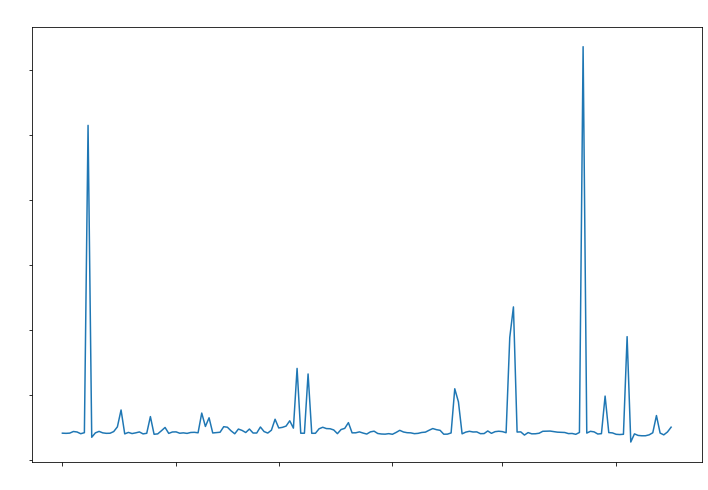

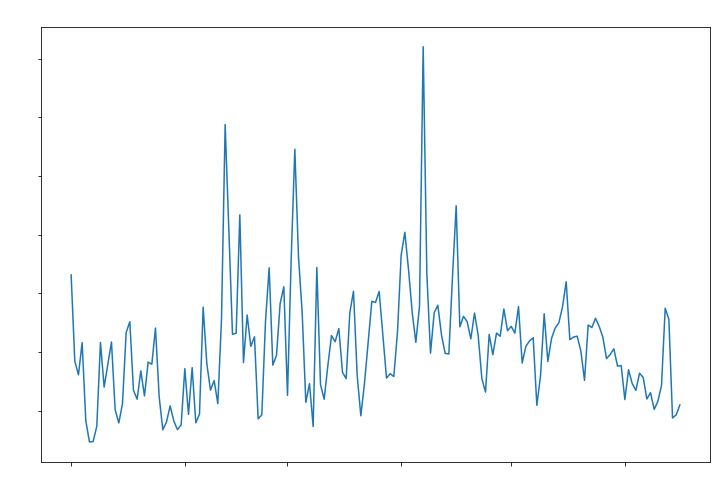

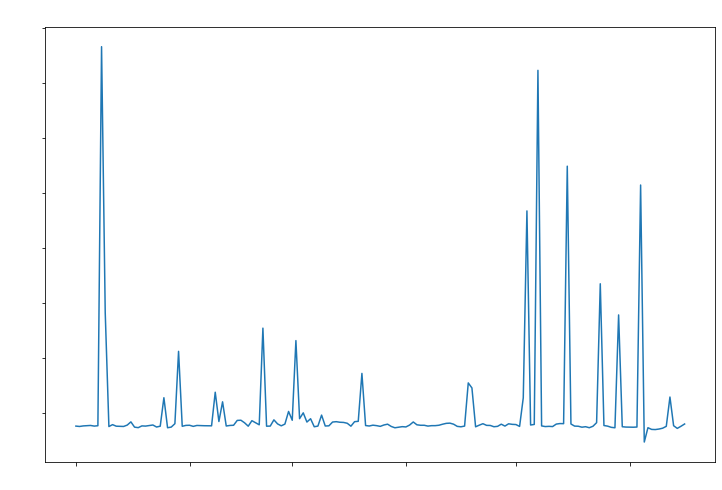

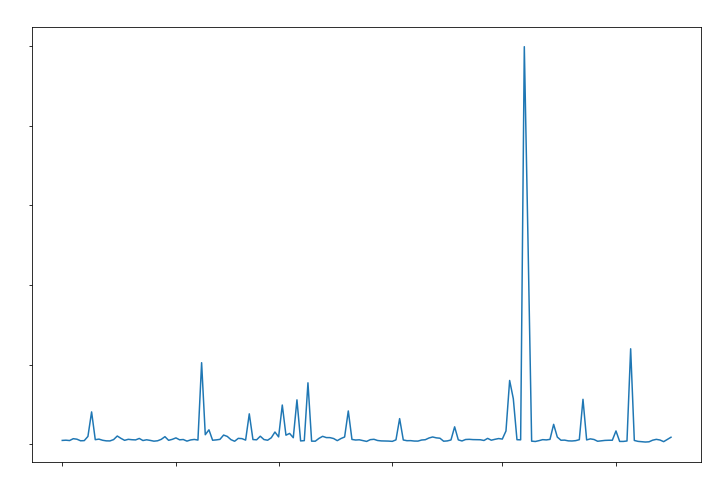

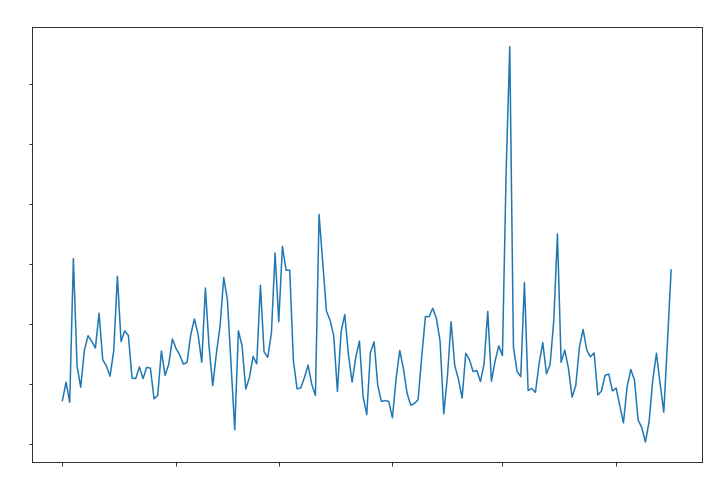

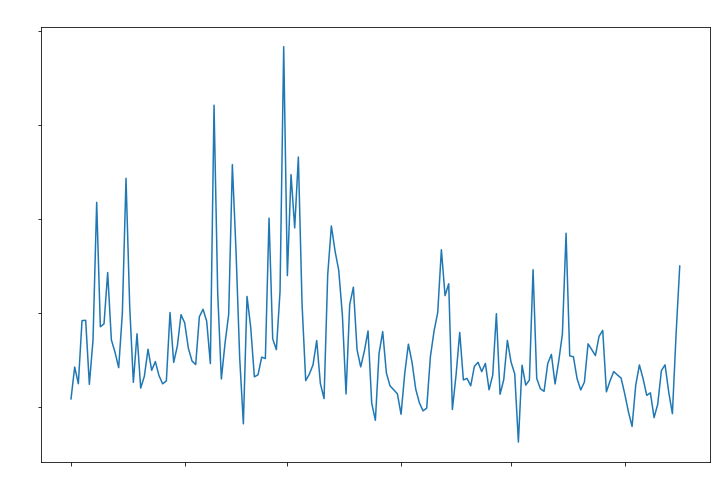

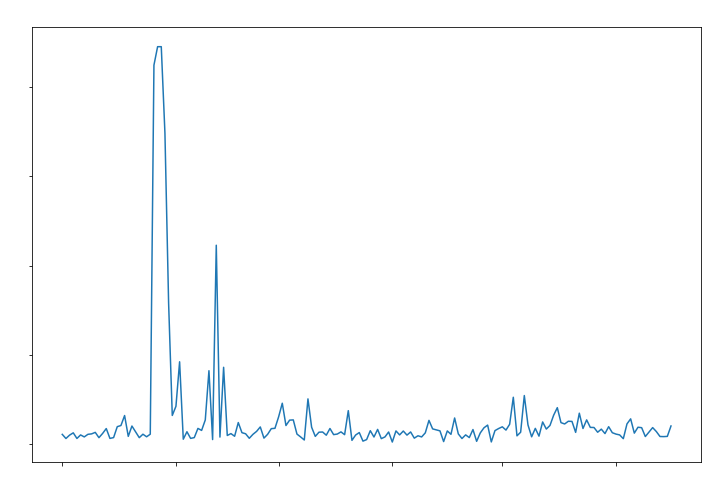

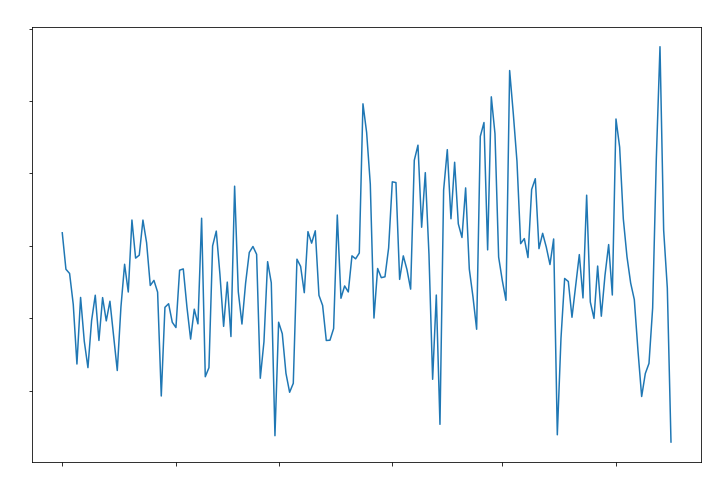

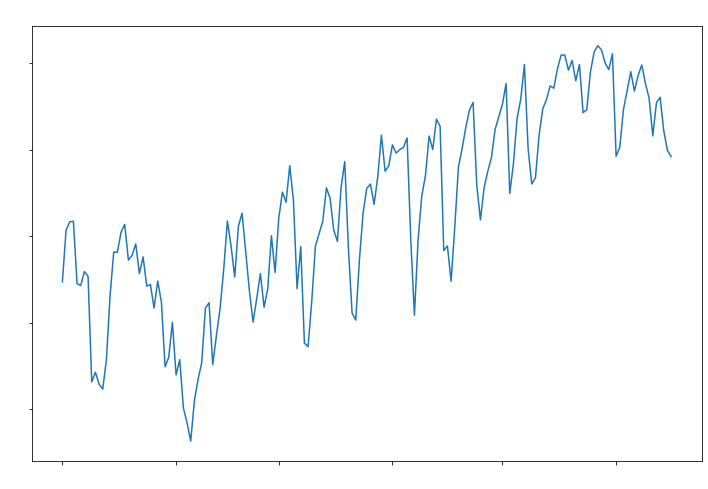

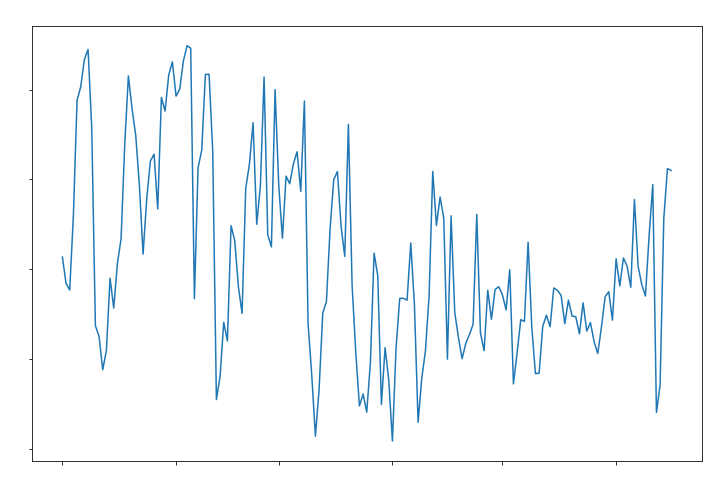

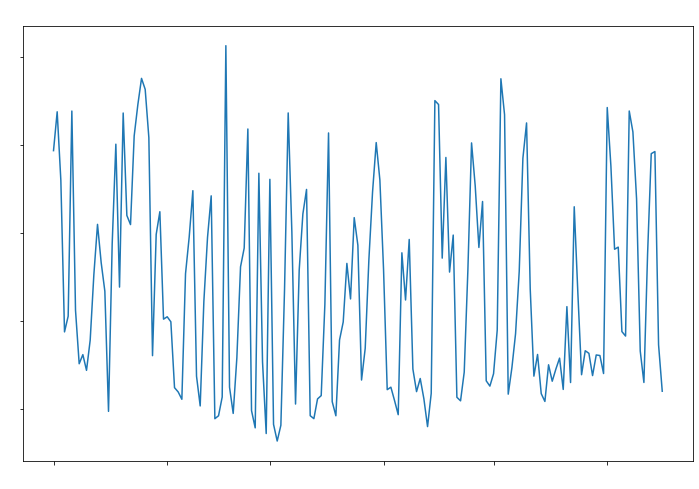

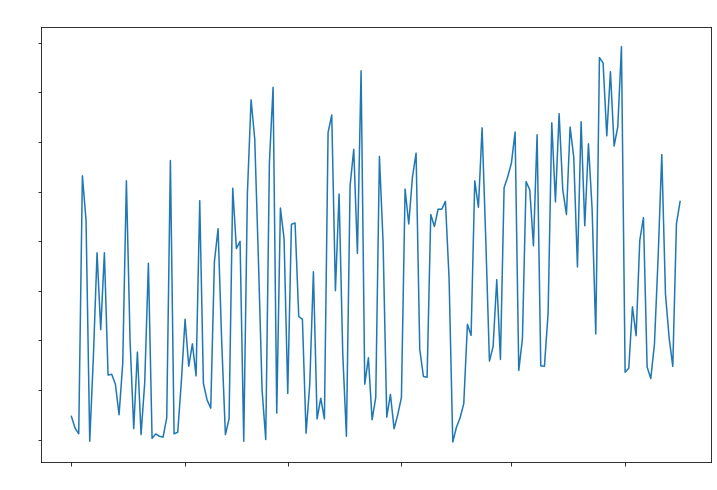

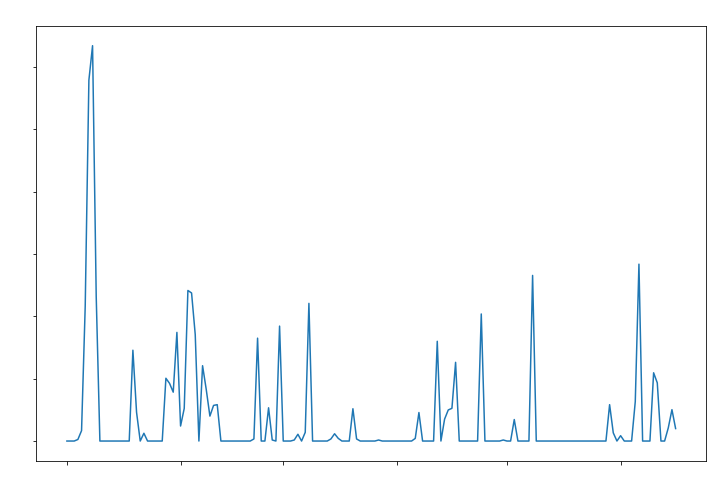

In [10]:
df_D = make_dataset.resample_df(df, freq='D')
visualize.draw_line_plot_by_column(df_D, font_prop=font_prop)

#### per Month

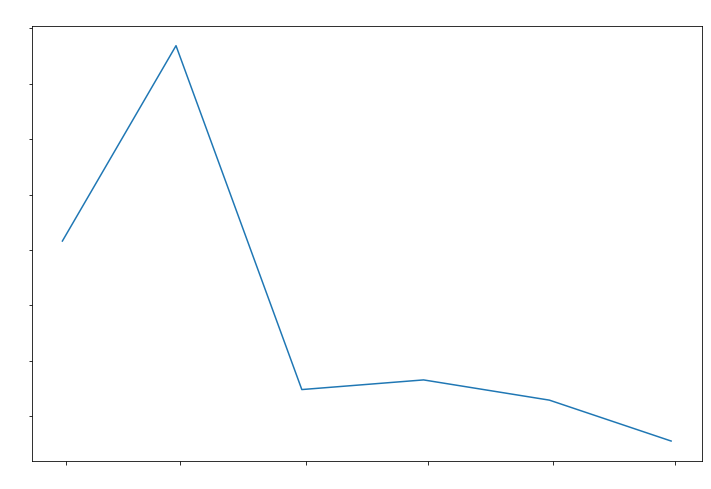

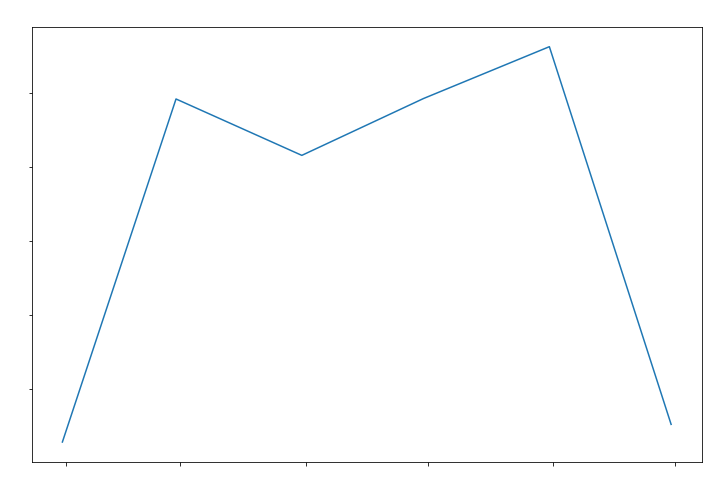

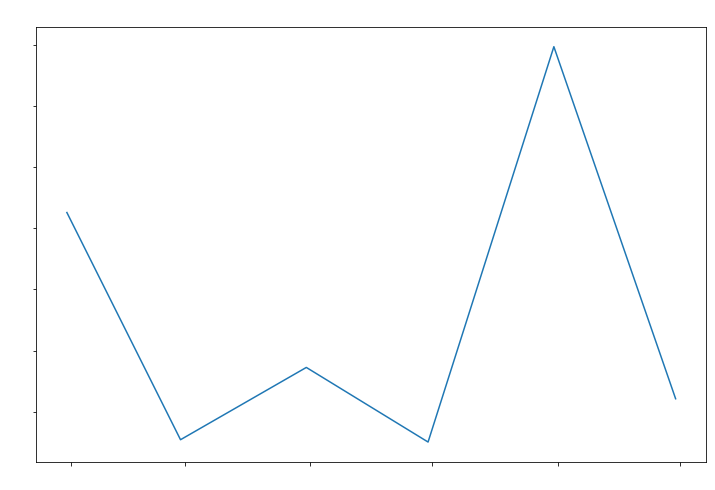

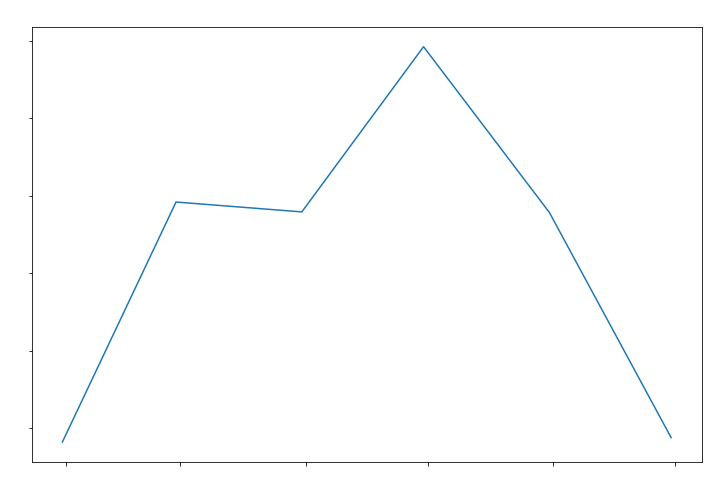

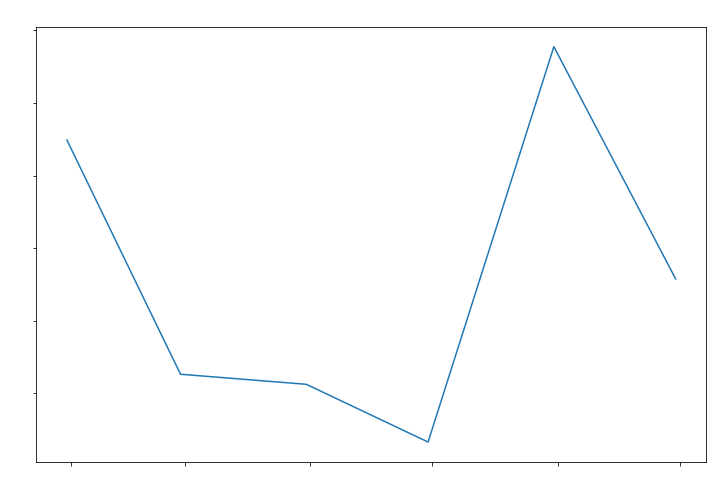

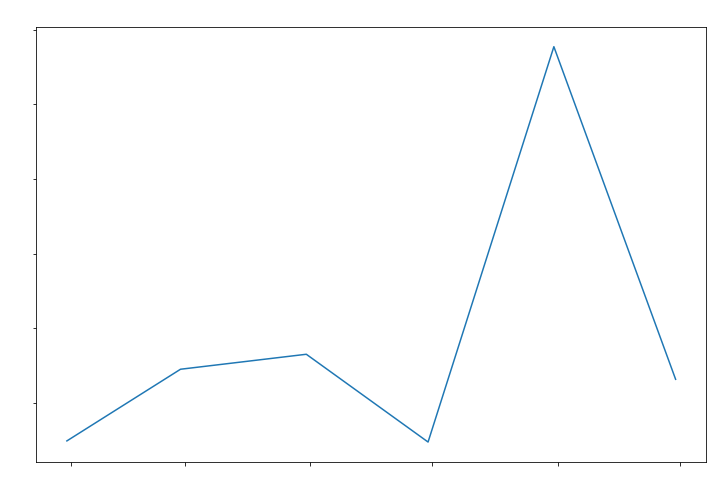

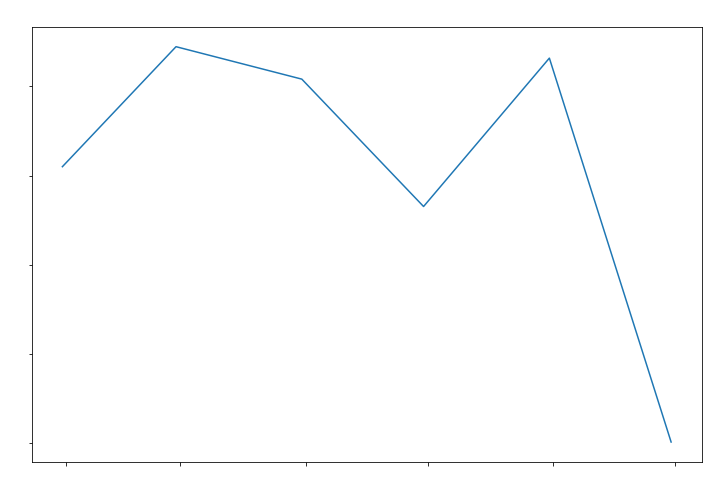

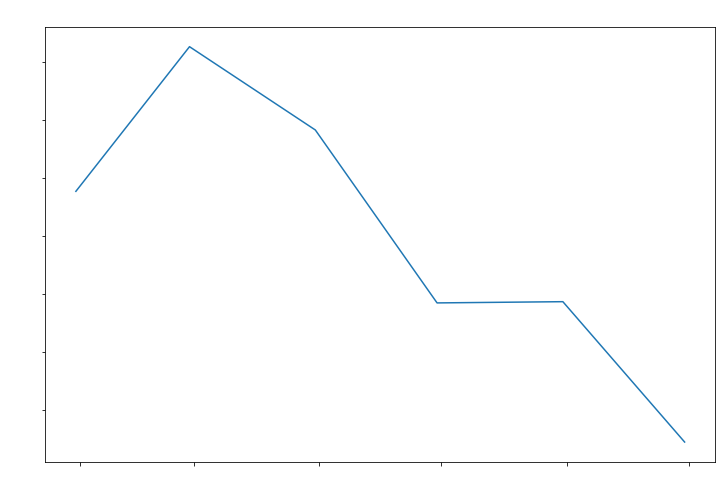

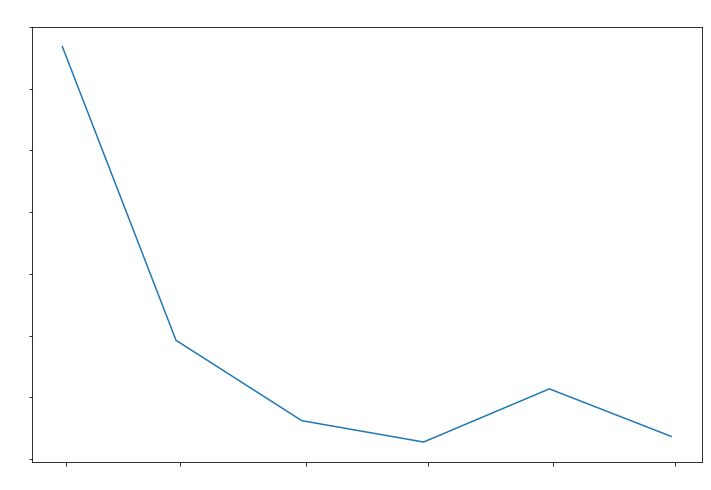

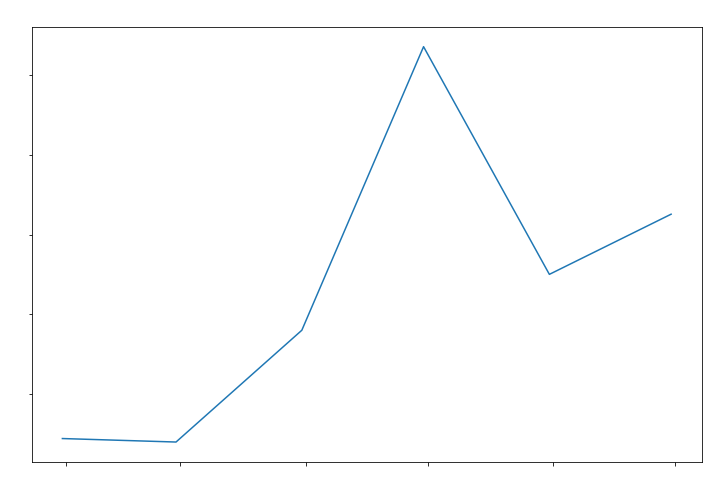

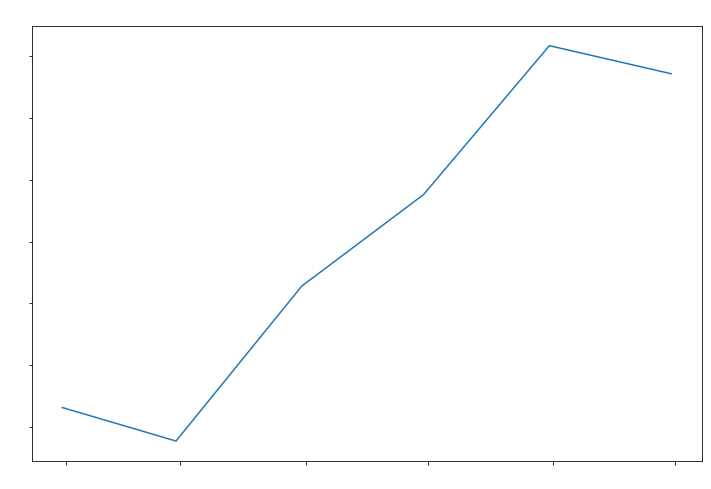

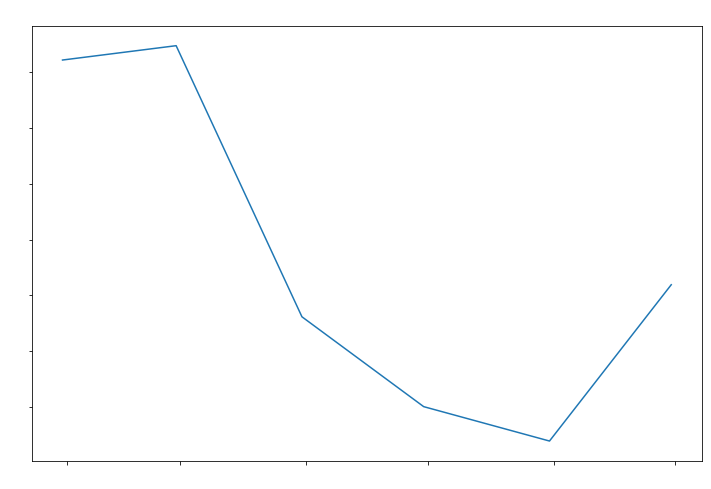

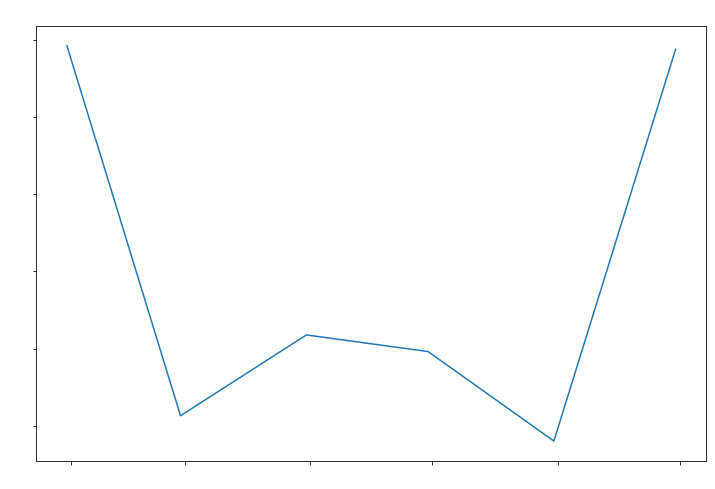

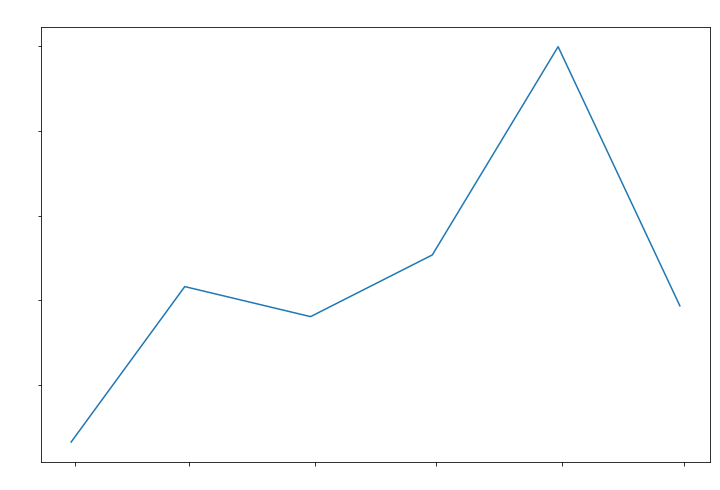

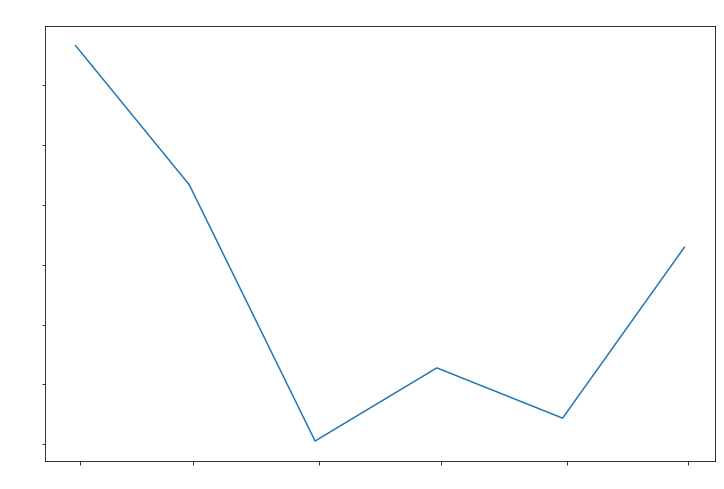

In [12]:
df_M = make_dataset.resample_df(df, freq='M')
visualize.draw_line_plot_by_column(df_M, font_prop=font_prop)